In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import matplotlib.dates
from IPython.display import display
pd.set_option('mode.chained_assignment', None)

In [19]:
filename = "log.txt"
df = pd.read_csv(filename, sep="|", header=None)

In [20]:
df.columns = ["time", "level", "file", "location", "contents"]

In [21]:
r = df.time.apply(lambda x: ":".join(x.split(":")[:-1]) + "." + x.split(":")[-1])

In [22]:
df.time = pd.to_datetime(r, errors="coerce")

In [23]:
cleaned_df = df[df.time.notnull()]

In [24]:
memory_df = cleaned_df[cleaned_df.contents.str.contains("WorkingSetSize", na=False, regex=False)]

In [25]:
working_set_size_df = memory_df[~memory_df.contents.str.contains("Peak", regex=False, na=True)]
s = working_set_size_df.contents.apply(lambda x: x.split(" ")[-1])
working_set_size_df.contents = pd.to_numeric(s, errors="coerce")
working_set_size_df = working_set_size_df[working_set_size_df.contents.notnull()]

In [26]:
peak_working_set_size_df = memory_df[memory_df.contents.str.contains("Peak", regex=False, na=False)]
t = peak_working_set_size_df.contents.apply(lambda x: x.split(" ")[-1])
peak_working_set_size_df.contents = pd.to_numeric(t, errors="coerce")
peak_working_set_size_df = peak_working_set_size_df[peak_working_set_size_df.contents.notnull()]

In [27]:
working_set_size_df.sort_values(by=["time"], inplace=True)
peak_working_set_size_df.sort_values(by=["time"], inplace=True)

In [35]:
level_to_color = {
    "WARNING": (.5, 0., .5, 0.2),
    "INFO": (0., .5, .5, 0.2),
    "ERROR": (1., 0., 0., 0.5)
}

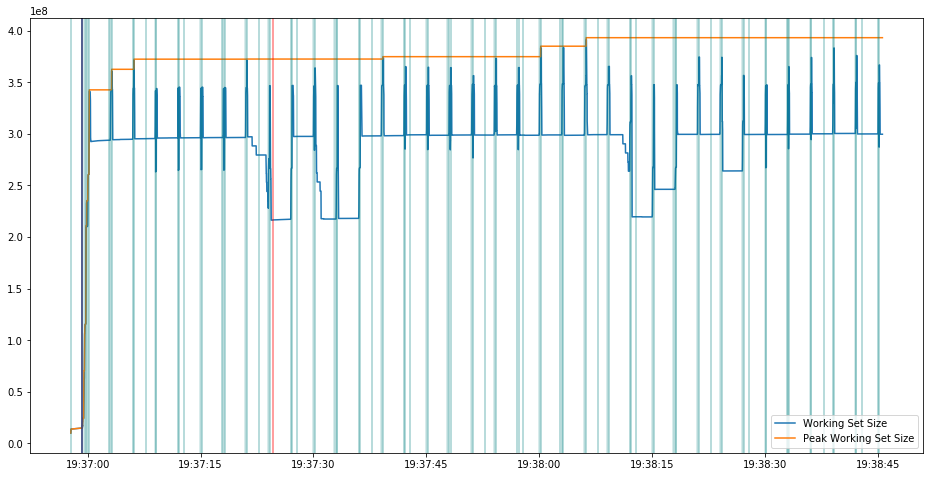

In [36]:
plt.figure(figsize=(16, 8))
plt.plot(working_set_size_df.time, working_set_size_df.contents, label="Working Set Size")
plt.plot(peak_working_set_size_df.time, peak_working_set_size_df.contents, label="Peak Working Set Size")
bb = cleaned_df.sort_values(by=["time"])
bb = bb[~bb.contents.str.contains("Working", regex=False, na=True)]
earliest_time = min(min(working_set_size_df.time), min(peak_working_set_size_df.time)) 
latest_time = max(max(working_set_size_df.time), max(peak_working_set_size_df.time))
for t, l in zip(bb.time, bb.level):
    if earliest_time <= t <= latest_time:
        plt.axvline(t, color=level_to_color[l.strip()])
plt.legend(loc='best')
plt.show()

In [37]:
def time_in_range(start, end, x):
    """Return true if x is in the range [start, end]"""
    if start <= end:
        return (start <= x) & (x <= end)
    else:
        return (start <= x) | (x <= end)

In [38]:
a = peak_working_set_size_df[peak_working_set_size_df.contents.diff() != 0]
windows = []
for j in range(1+(a.time.diff() >= datetime.timedelta(seconds=1)).cumsum().max()):
    windows.append(a[(a.time.diff() >= datetime.timedelta(seconds=1)).cumsum() == j])
for j in range(len(windows)):
    windows[j] = peak_working_set_size_df[time_in_range(windows[j].time.iloc[0] - datetime.timedelta(seconds=1),
                                          windows[j].time.iloc[-1] + datetime.timedelta(seconds=1),
                                          peak_working_set_size_df.time)]

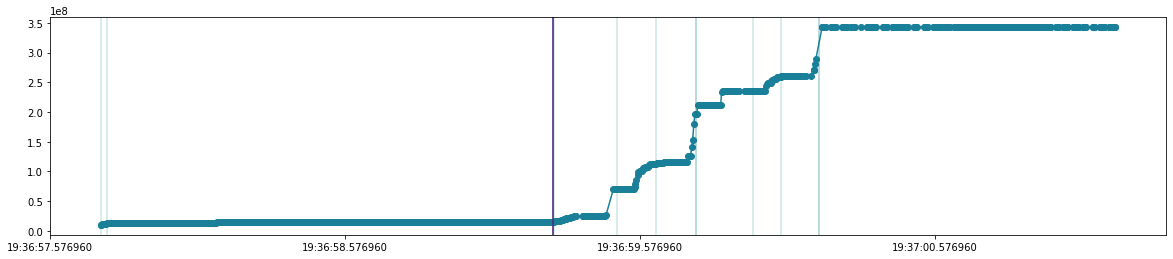

,time,level,file,location,contents
13,2020-05-10 19:36:57.749,INFO,network.c,SendTCPPacket:117,Sending TCP Packet of length 436
30,2020-05-10 19:36:57.768,INFO,wasapicapture.c,CreateAudioDevice:85,Minimum period: 30000
1004,2020-05-10 19:36:59.281,INFO,dxgicapture.c,CreateCaptureDevice:19,Creating capture device for resolution 3200x1...
1016,2020-05-10 19:36:59.282,INFO,dxgicapture.c,CreateCaptureDevice:184,Device Name: \\.\DISPLAY1
1015,2020-05-10 19:36:59.282,INFO,dxgicapture.c,CreateCaptureDevice:171,Found Resolution: 0x0
1014,2020-05-10 19:36:59.282,INFO,dxgicapture.c,CreateCaptureDevice:126,Number of display modes: 0
1013,2020-05-10 19:36:59.282,INFO,dxgicapture.c,CreateCaptureDevice:125,Target Resolution: 3200x1800
1012,2020-05-10 19:36:59.282,WARNING,dxgicapture.c,CreateCaptureDevice:119,Could not GetDisplayModeList: 887A0022
1011,2020-05-10 19:36:59.282,WARNING,dxgicapture.c,CreateCaptureDevice:112,Could not GetDisplayModeList: 887A0022
1010,2020-05-10 19:36:59.282,INFO,dxgicapture.c,CreateCaptureDevice:77,Found monitor 0 on adapter 0


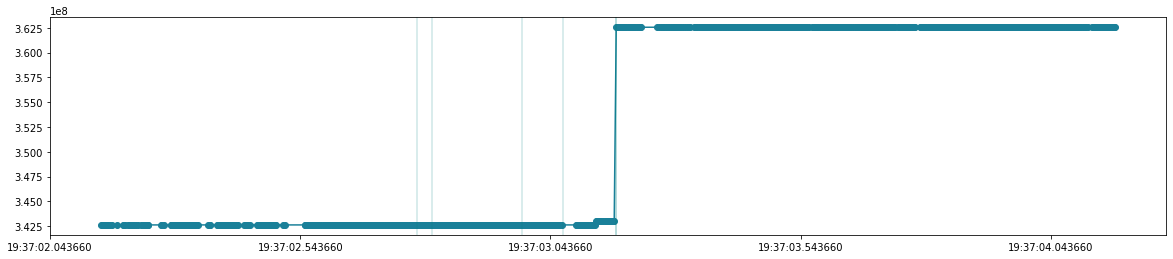

,time,level,file,location,contents
3004,2020-05-10 19:37:02.777,INFO,network.c,SendJSONPost:1296,Webserver Response: HTTP/1.1 200 OK
3034,2020-05-10 19:37:02.807,INFO,network.c,SendJSONPost:1296,Webserver Response: HTTP/1.1 200 OK
3187,2020-05-10 19:37:02.986,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
3252,2020-05-10 19:37:03.069,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.082806
3315,2020-05-10 19:37:03.175,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
3316,2020-05-10 19:37:03.175,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!


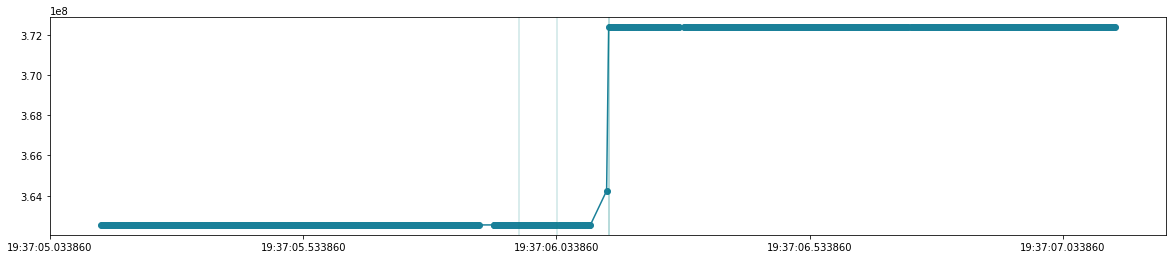

,time,level,file,location,contents
5346,2020-05-10 19:37:05.960,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
5406,2020-05-10 19:37:06.035,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.074935
5455,2020-05-10 19:37:06.137,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
5456,2020-05-10 19:37:06.137,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!


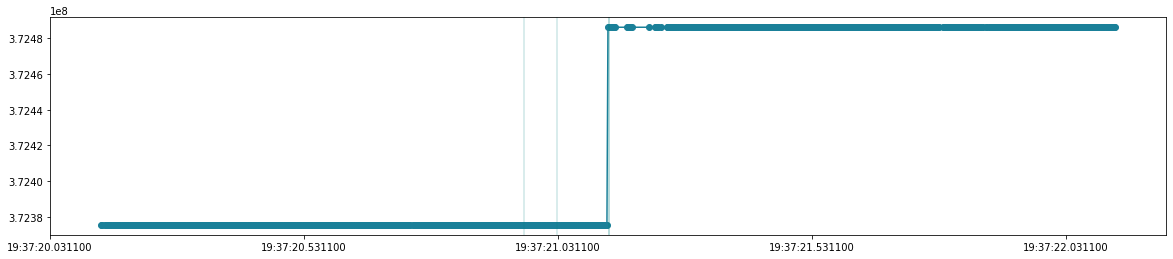

,time,level,file,location,contents
15867,2020-05-10 19:37:20.965,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
15913,2020-05-10 19:37:21.029,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.064793
15986,2020-05-10 19:37:21.133,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!
15985,2020-05-10 19:37:21.133,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!


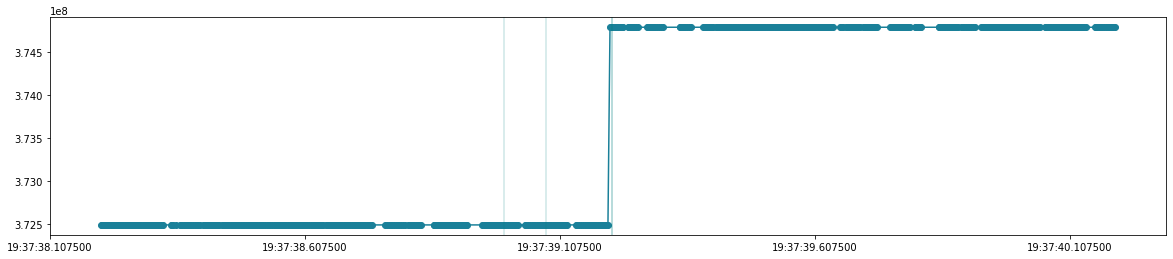

,time,level,file,location,contents
27550,2020-05-10 19:37:38.998,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
27598,2020-05-10 19:37:39.081,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.082954
27676,2020-05-10 19:37:39.209,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
27677,2020-05-10 19:37:39.209,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!


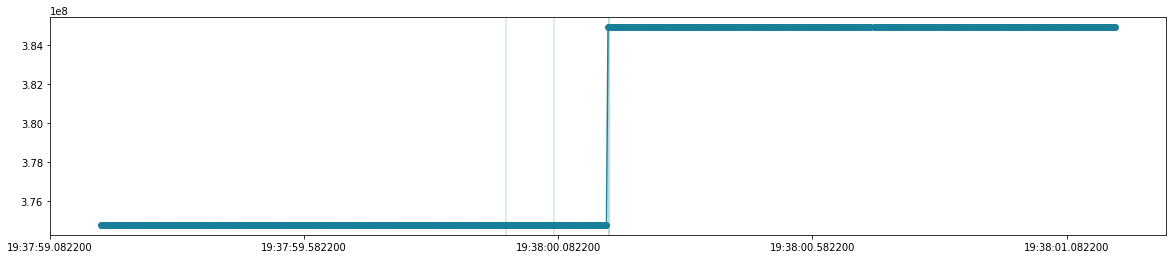

,time,level,file,location,contents
40960,2020-05-10 19:37:59.980,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
41023,2020-05-10 19:38:00.073,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.093214
41095,2020-05-10 19:38:00.182,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
41096,2020-05-10 19:38:00.182,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!


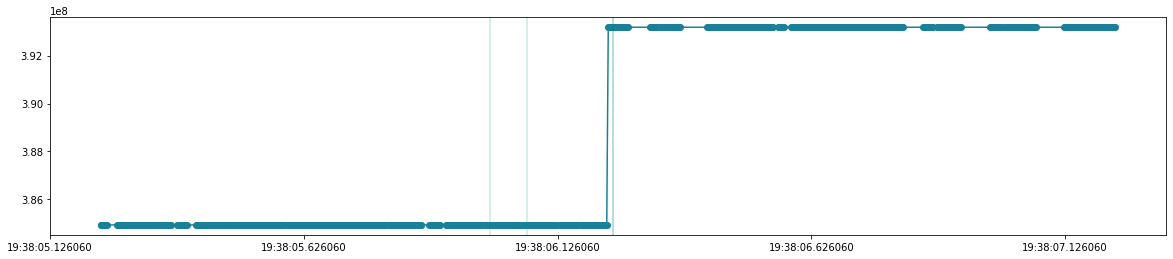

,time,level,file,location,contents
45011,2020-05-10 19:38:05.992,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
45075,2020-05-10 19:38:06.066,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.073328
45207,2020-05-10 19:38:06.235,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
45208,2020-05-10 19:38:06.235,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!


In [39]:
for window in windows:
    in_window = time_in_range(window.time.iloc[0], window.time.iloc[-1], cleaned_df.time)
    b = cleaned_df[in_window].sort_values(by=["time"])
    b = b[~b.contents.str.contains("Working", regex=False, na=True)]
    in_window = time_in_range(window.time.iloc[0], window.time.iloc[-1], peak_working_set_size_df.time)
    plt.figure(figsize=(20, 4))
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M:%S.%f"))
    plt.plot(peak_working_set_size_df[in_window].time, peak_working_set_size_df[in_window].contents, 'o-', color=(0.1, 0.5, 0.6))
    for t, l in zip(b.time, b.level):
        plt.axvline(t, color=level_to_color[l.strip()])
    plt.show()
    display(b)